<a href="https://colab.research.google.com/github/HannahParker/cse480-notebooks/blob/master/06_1_Readiness_Assurance_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readiness Assurance Test
## Due: Monday, 8 February 2021, 2:30pm

## Imports, then the actual RAT

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 18.98 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

# DFA and NFA

## DFA conform to the rules of NFA, but not (always) vice versa.

### Formal Definition of DFA
A DFA is a 5-tuple $(Q, \Sigma, \delta, q_0, F)$, where

1. $Q$ is a finite set called the **states**,
2. $\Sigma$ is a finite set called the **alphabet**,
3. $\delta: Q \times \Sigma \rightarrow Q$ is the **transition function**,
4. $q_0 \in Q$ is the **start state**, and
5. $F \subseteq Q$ is the **set of accept states** (or **final** states).

### Formal Definition of NFA
An NFA is a 5-tuple $(Q, \Sigma, \delta, Q_0, F)$, where

1. $Q$ is a finite set called the **states**,
2. $\Sigma$ is a finite set called the **alphabet** (which does not include $\varepsilon$),
3. $\delta: Q \times \Sigma_{\varepsilon} \rightarrow \mathcal{P}(Q)$ is the **transition function** ($\Sigma_{\varepsilon}$ is short for $\Sigma \cup \{\varepsilon\})$,
4. $Q_0 \subseteq Q$ is the **set of start states**, and
5. $F \subseteq Q$ is the **set of accept states** (or **final** states).

## Equivalence

NFA can be converted into DFA because they both represent regular languages, which can be represented by regular expressions, which can be converted to and from NFA.

### Formal Definition of RE (Regular Expressions)

$R$ is a **regular expression** (an **RE** for short) if $R$ is any of


* {} (the empty set $\emptyset$) 
* {''} (the set containing the empty string $\{\varepsilon\}$)
* $\{a\}$ for some $a \in \Sigma$
* $R_1 \cup R_2$ where $R_1$ and $R_2$ are **RE**s 
* $R_1 \circ R_2$ where $R_1$ and $R_2$ are **RE**s 
* $R^*$ where $R$ is an **RE**

Some shorthand:

* $a \equiv \{a\}$
* $\varepsilon \equiv \{\varepsilon\}$
* $R^+ \equiv R \circ R^*$
* $R^* \equiv R^+ \cup \varepsilon$
* $R^k \equiv R \circ R \circ R \circ \cdots \circ R$ ($k$ times)

Note: $R \circ R$ is usually written without the $\circ$ (concatenation operator), i.e., $RR$.

In this regard, $\circ$ is analogous to the multiplication operator.

In this regard, $\circ$ is analogous to any multiplication operator. Often times multiplication operators are not written out. If two numbers are written side by side (in parethesis), it's a given that the numbers are supposed to be multiplied. 

## Question to Answer
In what other way(s) is $\circ$ analogous to the multiplication operator?

Your answer goes here.

## Easy to Design

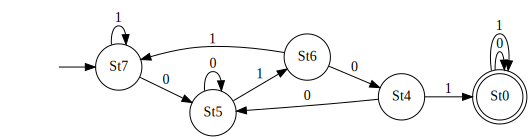

In [4]:
nfa1 = '''
NFA
I    : 0|1 -> I
I    : 0   -> S0
S0   : 1   -> S01
S01  : 0   -> S010
S010 : 1   -> F
F    : 0|1 -> F
'''
mc = md2mc(nfa1)
dfa = min_dfa(nfa2dfa(mc))
# try mc also changing dotObj_dfa to dotObj_nfa
dotObj_dfa(dfa)

A good name for ```nfa1``` is

In [ ]:
name1 = 'contains0101'  #@param {type: "string"}

An RE for the language of ```nfa1``` is

In [ ]:
re1 = '{1*00*101(0 + 1)}  #@param {type: ""}

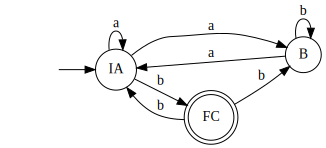

In [5]:
nfa2 = md2mc('''NFA    
IA : a -> IA          
IA : a -> B           
IA : b -> FC          
B  : a -> IA          
B  : b -> B           
FC : b -> IA          
FC : b -> B           
''')                  
dotObj_nfa(nfa2)

A good name for ```nfa2``` is


In [ ]:
name2 = 'contains_abab'  #@param {type: "string"}

An RE for the language of ```nfa2``` is

In [ ]:
re2 = 'a*(a + b(b*ab))'  #@param {type: "string"}

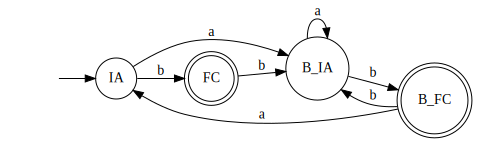

In [7]:
nfa3 = md2mc('''NFA              
IA : a -> IA                    
IA : a -> B                     
IA : b -> FC                    
B  : a -> IA                    
B  : b -> B                     
FC : b -> IA                    
FC : b -> B                     
''')                            
                                
dfa = nfa2dfa(totalize_nfa(nfa3))
dotObj_dfa(dfa)

A good name for ```nfa3``` is


In [ ]:
name3 = 'contains_bbab'  #@param {type: "string"}

An RE for the language of ```nfa3``` is

In [ ]:
re3 = '(a + b(a*b)(ba*b))'  #@param {type: "string"}

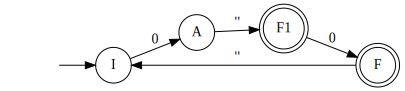

In [8]:
nfa4 = md2mc('''NFA    
I : 0 -> A            
A : '' -> F1          
F1 : 0 -> F           
F : '' -> I           
''')                  
                      
dotObj_nfa(nfa4)

A good name for ```nfa4``` is


In [ ]:
name4 = 'contains_epsilon'  #@param {type: "string"}

An RE for the language of ```nfa4``` is

In [ ]:
re4 = '0''0'''  #@param {type: "string"}

## Easy to Simulate

With code:

In [9]:
nfa5 = md2mc('''NFA                                                 
I    : 0|1 -> I                                                    
I    : 0   -> S0                                                   
S0   : 0|1   -> S01                                                
S01  : 0|1   -> S010                                               
S010 : 0|1   -> F                                                  
''')                                                               
                                                                   
for i in range(200):                                               
    into_the_depths = bin(i)[2:].zfill(5)                          
    print(into_the_depths, ': ', accepts_nfa(nfa5, into_the_depths))

00000 :  True
00001 :  True
00010 :  True
00011 :  True
00100 :  True
00101 :  True
00110 :  True
00111 :  True
01000 :  False
01001 :  False
01010 :  False
01011 :  False
01100 :  False
01101 :  False
01110 :  False
01111 :  False
10000 :  True
10001 :  True
10010 :  True
10011 :  True
10100 :  True
10101 :  True
10110 :  True
10111 :  True
11000 :  False
11001 :  False
11010 :  False
11011 :  False
11100 :  False
11101 :  False
11110 :  False
11111 :  False
100000 :  True
100001 :  True
100010 :  True
100011 :  True
100100 :  True
100101 :  True
100110 :  True
100111 :  True
101000 :  False
101001 :  False
101010 :  False
101011 :  False
101100 :  False
101101 :  False
101110 :  False
101111 :  False
110000 :  True
110001 :  True
110010 :  True
110011 :  True
110100 :  True
110101 :  True
110110 :  True
110111 :  True
111000 :  False
111001 :  False
111010 :  False
111011 :  False
111100 :  False
111101 :  False
111110 :  False
111111 :  False
1000000 :  True
1000001 :  True
1000010 

With the Animation Panel:

In [14]:
AnimateNFA(nfa5, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
 